CIFAR10 veri kümesi: uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi gibi nesnelerin görüntülerini içerir.
Görüntü boyutları 3 kanallı renkli görüntülerdir ve boyutları 32x32 pikseldir.
Eğitim Adımları:
1. CIFAR10 veri kümesini yükle ve normalize et. CIFAR10, farklı nesne sınıflarından oluşan bir veri kümesidir ve PyTorch kütüphanesi ile kullanılabilir.
2. Bir evrişimli sinir ağı (convolutional neural network) tanımla. Bu ağ, görüntülerin özelliklerini öğrenmek için evrişim ve havuzlama katmanlarından oluşur.
3. Bir kayıp fonksiyonu tanımla. Bu fonksiyon, ağın tahminlerini gerçek etiketlerle karşılaştırarak eğitim sırasında ağın performansını ölçer.
4. Ağı eğitim verisi üzerinde eğit. Bu adımda, modelin ağırlıkları ve önyargıları, eğitim verileri kullanılarak optimize edilir ve ağın doğruluğu artırılır.
5. Ağı test verisi üzerinde test et. Eğitim tamamlandıktan sonra, modelin gerçek dünya verileri üzerinde nasıl performans gösterdiğini değerlendirmek için ağın test verisi üzerinde test edilmesi gerekir.

Bu adımların her biri, bir derin öğrenme modelini eğitmek için temel adımları temsil eder. Her adımın doğru bir şekilde uygulanması, modelin iyi bir performans göstermesini sağlar.


1. **PyTorch ve torchvision Kütüphanelerinin İçeri Aktarılması**: İlk olarak, PyTorch ve torchvision kütüphaneleri içe aktarılır. PyTorch, derin öğrenme modelleri oluşturmak ve eğitmek için kullanılan bir kütüphane iken, torchvision, görüntü verileri üzerinde çalışmak için özellikle kullanışlı olan bir alt kütüphanesidir.

2. **Veri Dönüşümlerinin Tanımlanması**: `transforms.Compose()` fonksiyonu, veri dönüşümlerini bir dizi olarak birleştirir. Burada, `transforms.ToTensor()` işlevi, görüntüleri tensörlere dönüştürürken, `transforms.Normalize()` işlevi, görüntü piksellerinin normalleştirilmesini sağlar. Bu, görüntülerin piksel değerlerini (-1 ile 1 arasında) ortalama ve standart sapma kullanarak normalize eder.

3. **Eğitim ve Test Veri Kümesinin Yüklenmesi**: `torchvision.datasets.CIFAR10()` işlevi, CIFAR10 veri kümesini yükler. CIFAR10, 10 farklı sınıfa ait renkli görüntülerden oluşan bir veri kümesidir. `root` parametresi, veri kümesinin kaydedileceği dizini belirtir. `train=True` parametresi, eğitim veri kümesini yüklemek için kullanılırken, `train=False` parametresi test veri kümesini yükler. `download=True` parametresi, veri kümesinin internetten otomatik olarak indirilmesini sağlar. `transform` parametresi, veri dönüşümlerini belirtir.

Bu adımlar, CIFAR10 veri kümesinin yüklenmesi ve tensörlere dönüştürülmesi için gereken ön işlemleri gerçekleştirir.


`(0.5,0.5,0.5),(0.5,0.5,0.5)` Bu parametreler, görüntülerin normalleştirilmesi için kullanılan ortalama ve standart sapma değerlerini belirtir. Normalleştirme, veri ön işleme adımlarından biridir ve genellikle verilerin aynı ölçekte olmasını sağlamak için yapılır.

- İlk demet, ortalama değerleri temsil eder. (0.5, 0.5, 0.5), her bir kanal için bir ortalama değerdir. RGB görüntülerde her piksel üç kanal içerir (kırmızı, yeşil, mavi), bu nedenle üç tane ortalama değeri vardır. Bu değerler, her pikselin ilgili kanal değerinden çıkarılmasıyla normalleştirmeyi gerçekleştirir.

- İkinci demet, standart sapma değerlerini temsil eder. (0.5, 0.5, 0.5), her bir kanal için bir standart sapma değeridir. Standart sapma, veri dağılımının ne kadar yayıldığını gösteren bir ölçüdür. Bu değerler, piksel değerlerinin bu standart sapma değerine bölünerek normalleştirilmesini sağlar.

Özetle, (0.5, 0.5, 0.5) değerleri, her bir renk kanalının piksel değerlerini normalize etmek için kullanılan ortalama ve standart sapma değerleridir. Bu sayede, görüntülerin piksel değerleri ortalama sıfır ve standart sapma bir olacak şekilde yeniden ölçeklenir, bu da modelin daha iyi öğrenmesini sağlar.

### Data Download

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch. optim as optim
import matplotlib .pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform) #indirecekseniz download=True yapmanız gerekiyor
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform) #indirecekseniz download=True yapmanız gerekiyor

### Data load

In [3]:
batch_size = 4
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [4]:
def image_show(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

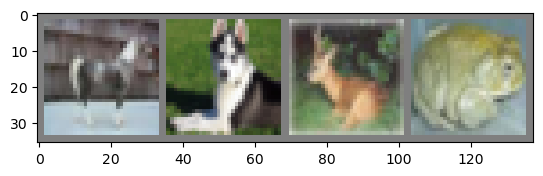

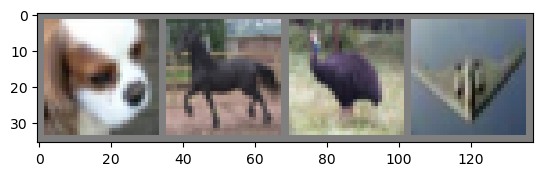

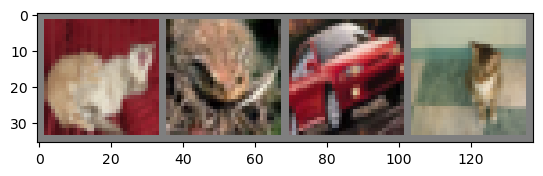

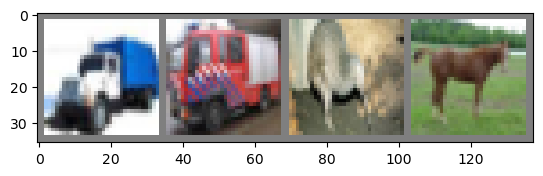

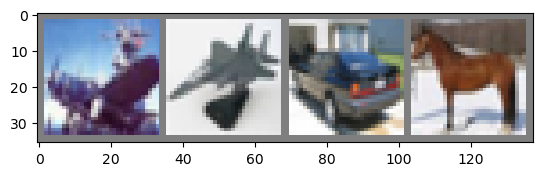

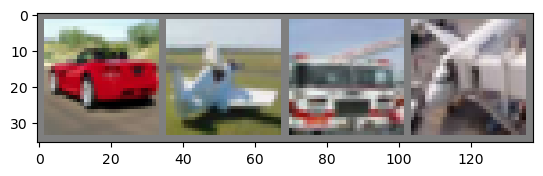

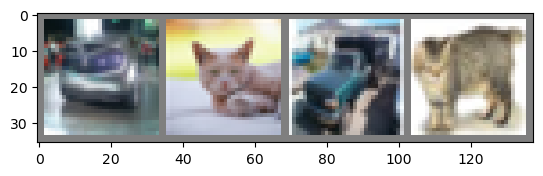

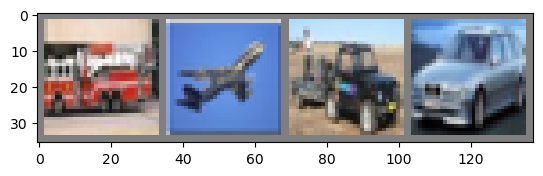

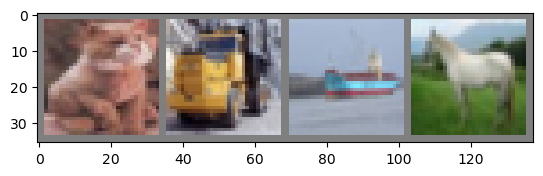

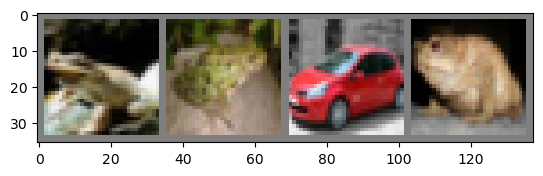

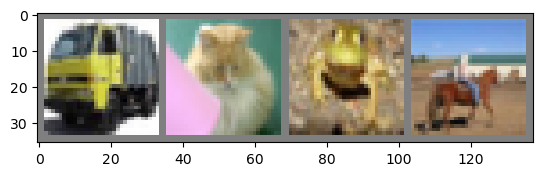

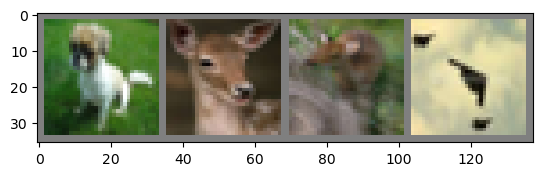

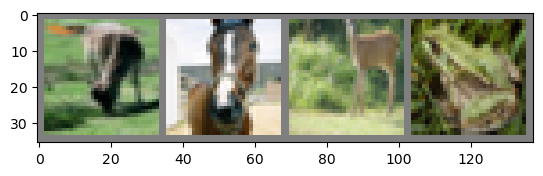

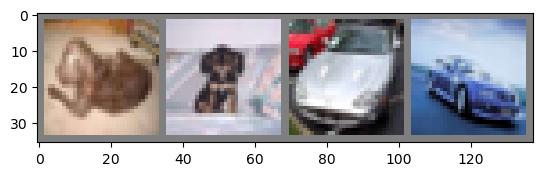

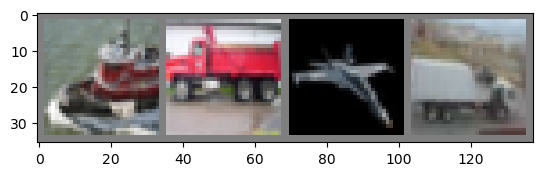

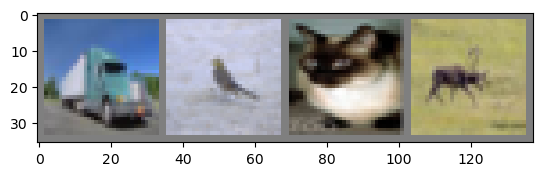

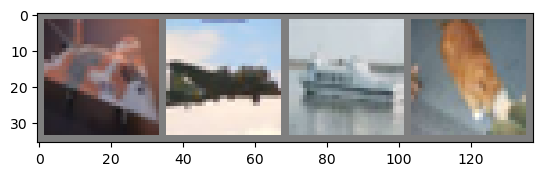

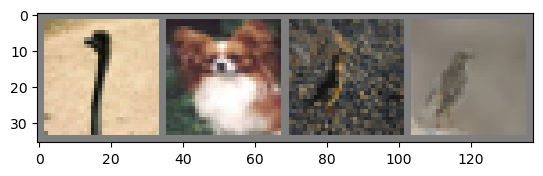

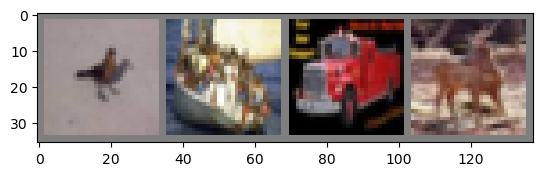

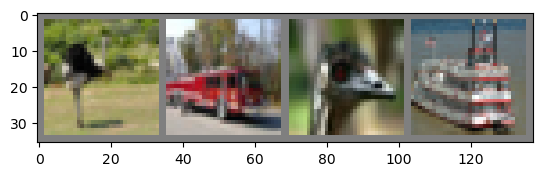

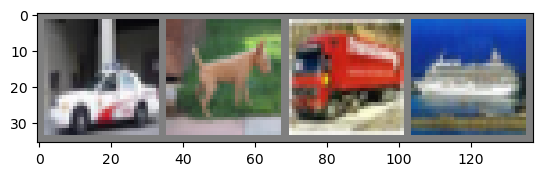

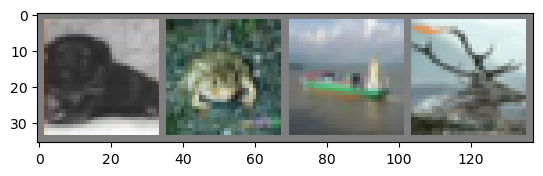

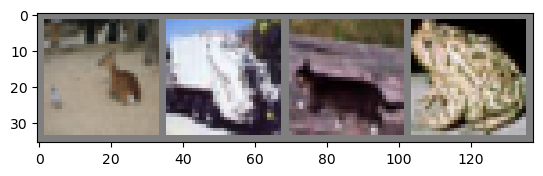

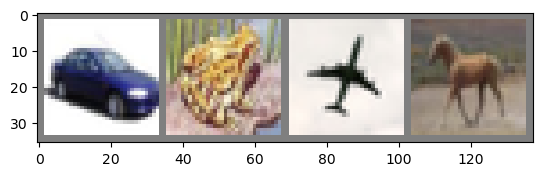

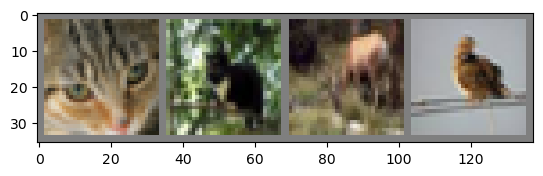

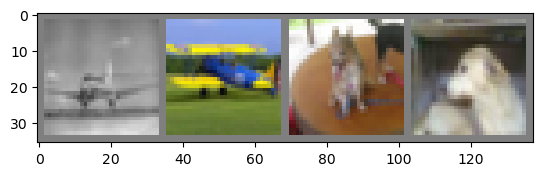

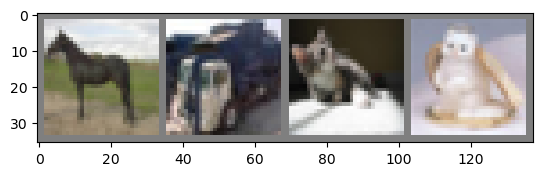

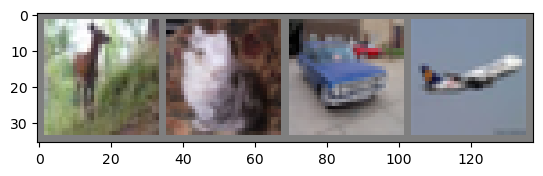

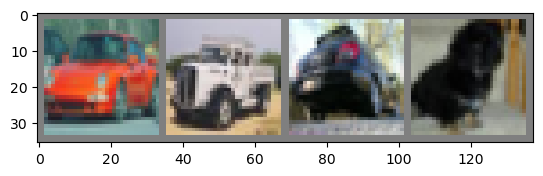

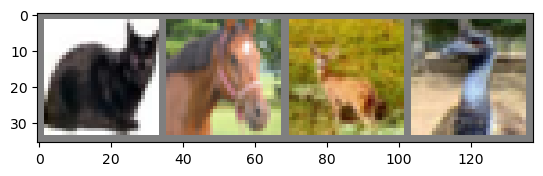

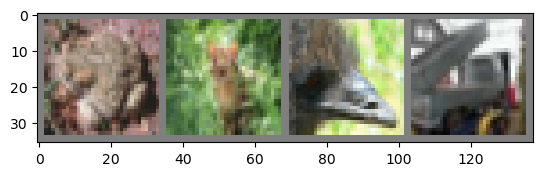

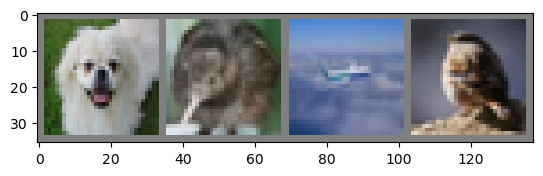

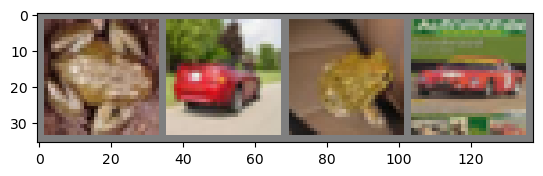

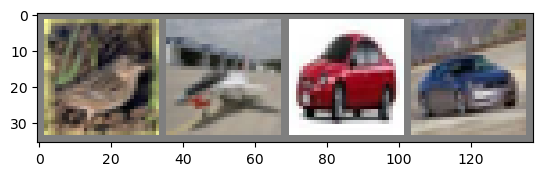

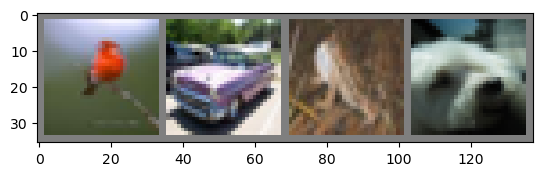

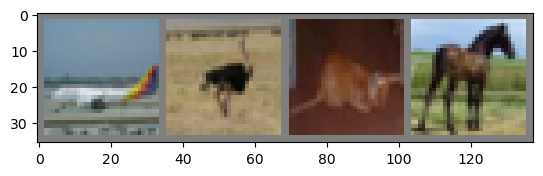

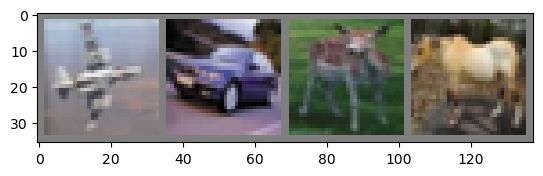

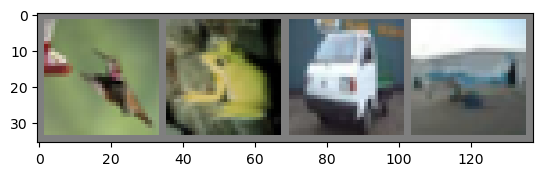

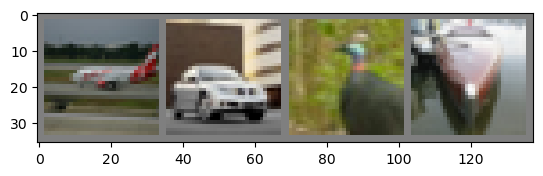

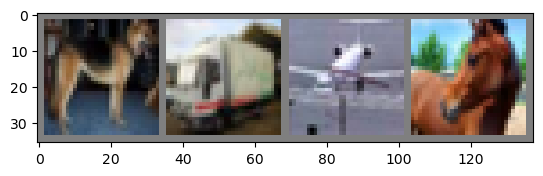

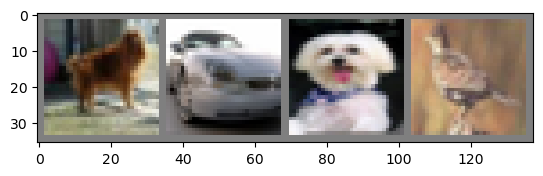

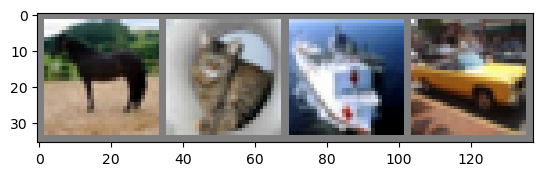

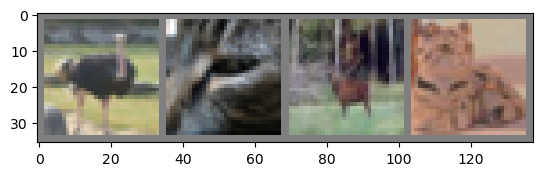

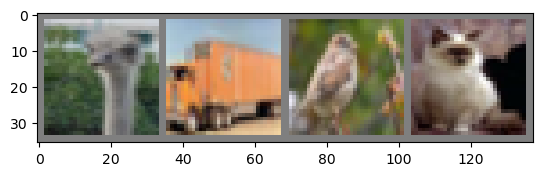

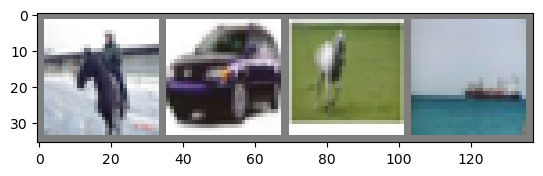

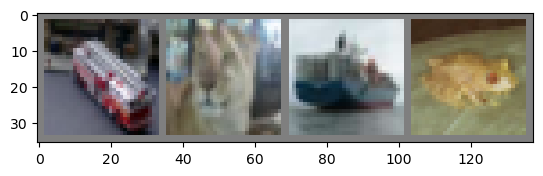

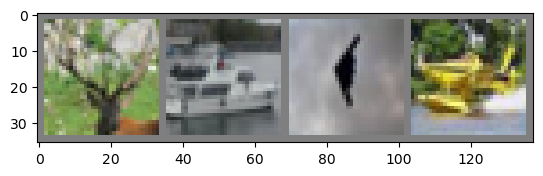

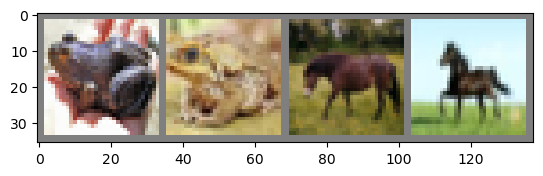

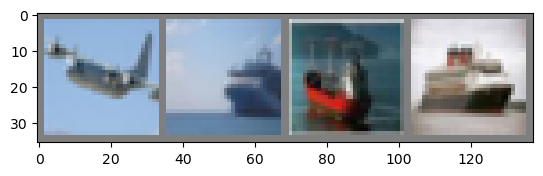

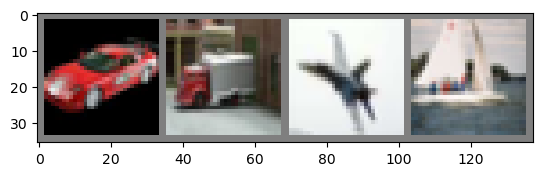

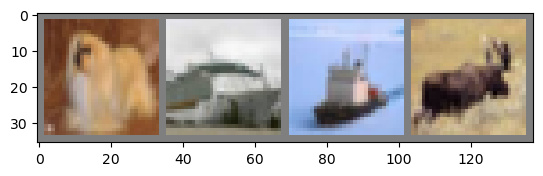

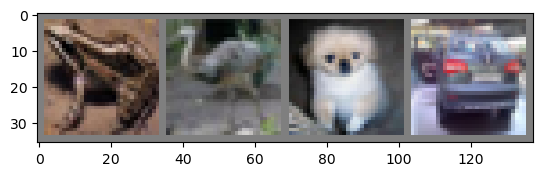

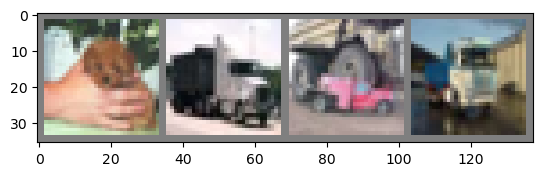

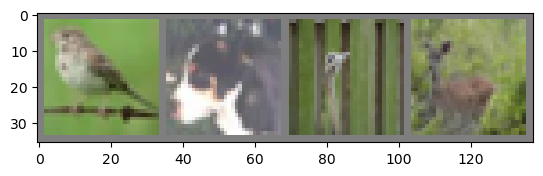

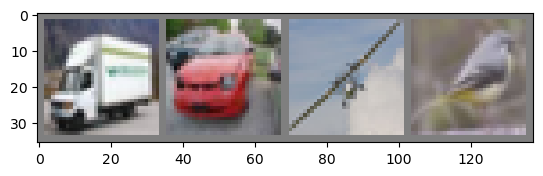

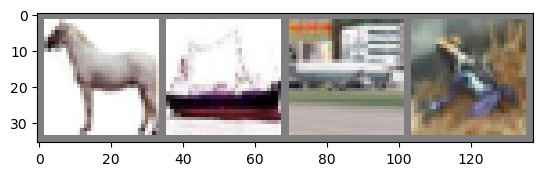

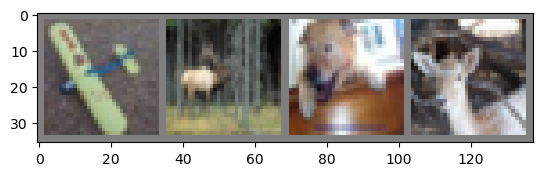

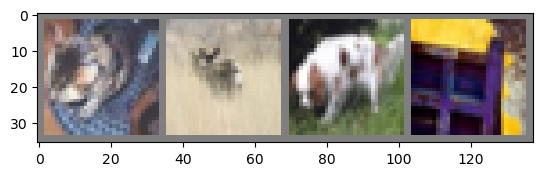

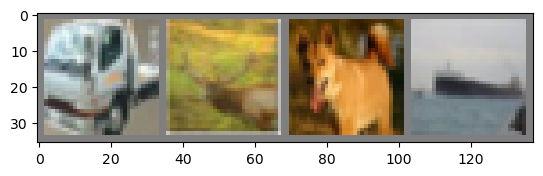

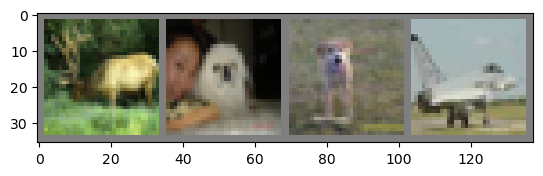

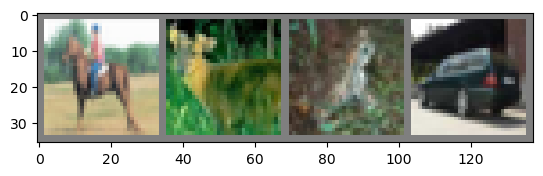

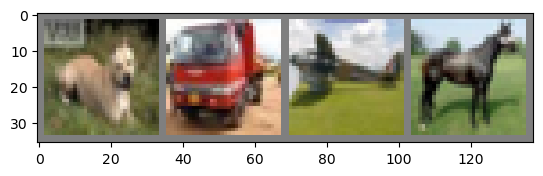

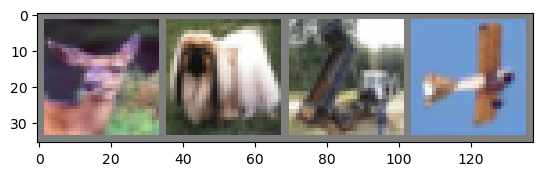

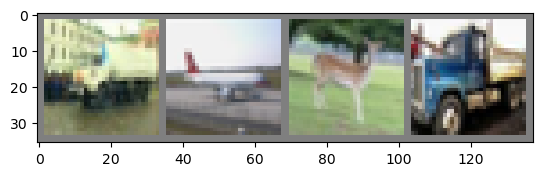

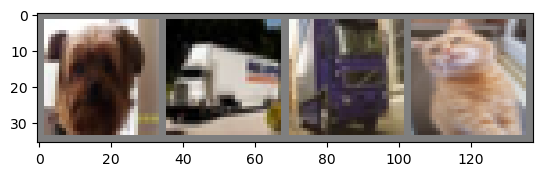

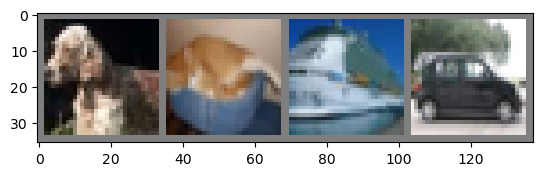

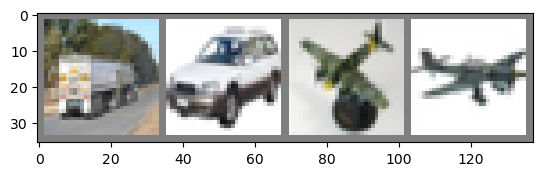

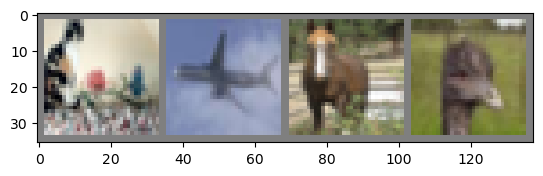

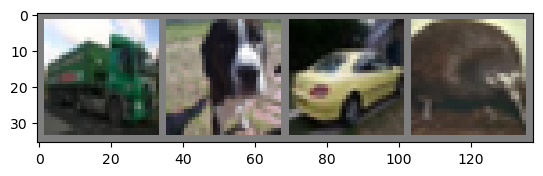

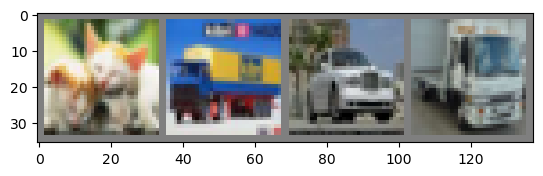

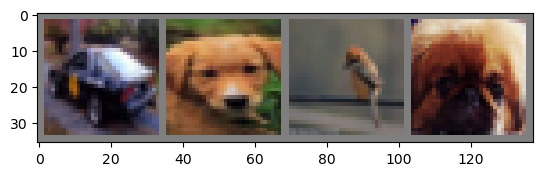

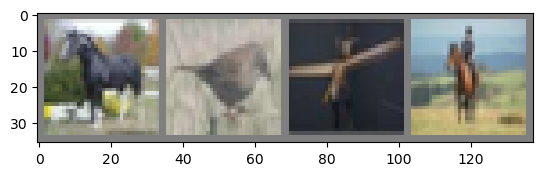

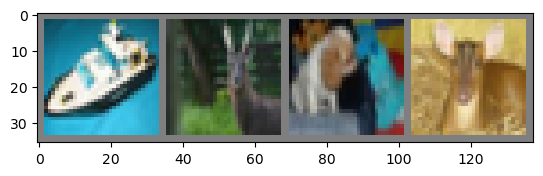

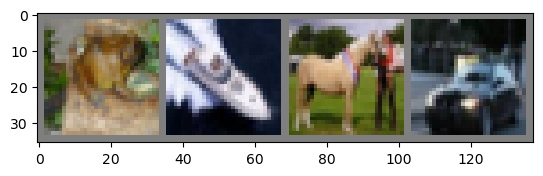

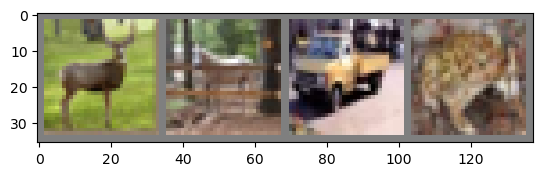

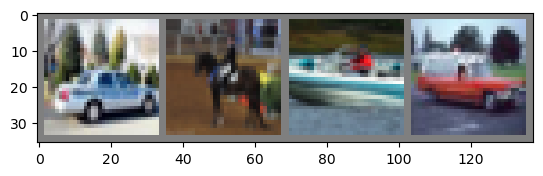

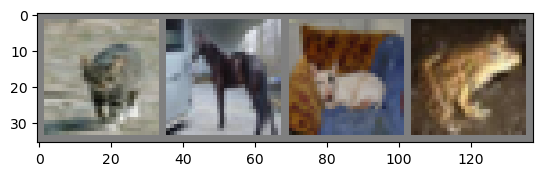

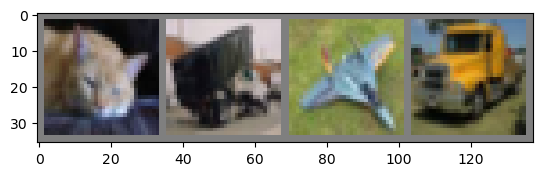

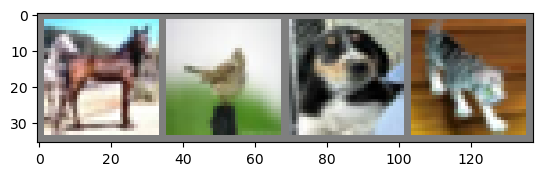

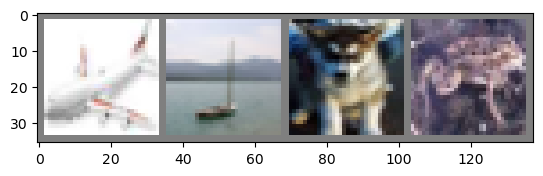

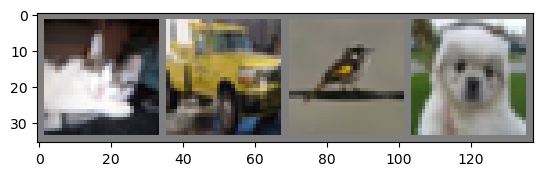

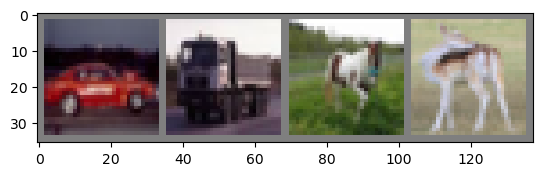

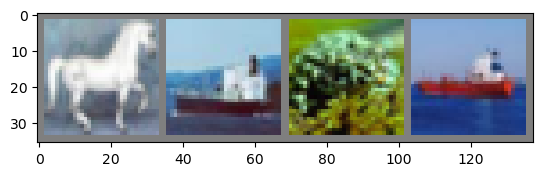

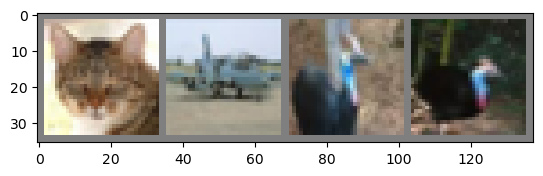

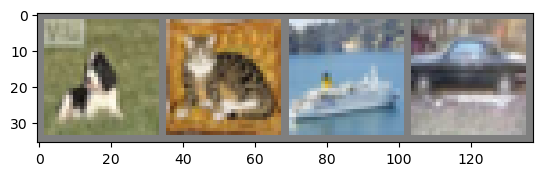

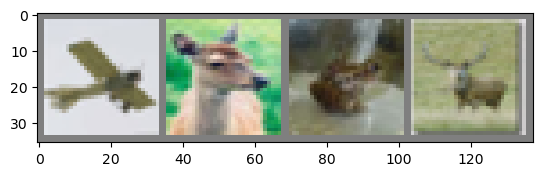

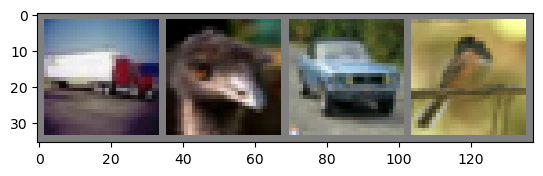

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [6]:
# Sadece bir örneği göstermek için ilk yığını alıyoruz
images, labels = next(iter(train_loader))

# Image'ı göstermek için image_show fonksiyonunu kullanıyoruz
image_show(torchvision.utils.make_grid(images))
